# FastFarmInterace: an MPI-based Python-FastFarm interface to develop wind farm control policies 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from wfcrl.environments import data_cases as cases
from wfcrl.interface import FastFarmInterface

sns.set_theme(style="darkgrid")

We start by chosing the case to simulate. The library comes with a list of pre-existing farm layouts that can be found in `environments/data_cases.py`. Let us use the `Farm6Fastfarm`, which has 6 turbines organized in 2 rows.

In [40]:
config = cases.FarmAblaincourtFastfarm()

In [41]:
config

7 turbines 
measurement_window: 200
	xcoords: [484.8, 797.1, 1038.8, 1377.6, 1716.9, 2057.3, 2400.0]
	ycoords: [274.0, 251.0, 66.9, -22.7, -112.5, -195.3, -259.0]
	dt: 3

We will control the yaw of all turbines, allowing to vary between -20 and 20°, with a maximum change between two iterations of 15°. We control the pitch between 0° and 45°, with a maximum step of 1°.

In [42]:
print(config.interface_kwargs)

{'measurement_window': 200, 'simul_kwargs': {'xcoords': [484.8, 797.1, 1038.8, 1377.6, 1716.9, 2057.3, 2400.0], 'ycoords': [274.0, 251.0, 66.9, -22.7, -112.5, -195.3, -259.0], 'dt': 3}}


In [43]:
num_iter = 100
ff_interface = FastFarmInterface(
    num_turbines=config.n_turbines,
    max_iter=num_iter,
    fast_farm_executable="bin/FAST.Farm_x64_OMP_2023.exe",
    **config.interface_kwargs
)

Deltas: [2.10730392e-05 5.68972057e-04 9.90432840e-04 1.60155098e-03
 2.19159607e-03 2.80271421e-03 3.41383234e-03]
Exception has been raise. I put this print statement instead. Check with EB.
Exception: Some X0_High are not on an integer multiple of the high-res grid
Created FAST.Farm input file: simulators/fastfarm/inputs/FarmInputs/Case.fstf


To change the yaw, pitch or torque command, use the method `update_command(yaw, pitch, torque)`. Let's control the yaw and pitch:

In [31]:
ff_interface.reset()
for i in range(num_iter):
    print("PYTHON: Iter ", i)
    yaw_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    pitch_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    if i > 20:
        yaw_command[0] = 30
        pitch_command[0] = 1
    ff_interface.update_command(yaw=yaw_command, pitch=pitch_command)
    print(f"Iter {i} - Sent command YAW {ff_interface.get_yaw_command()} - "
          f" PITCH {ff_interface.get_pitch_command()}"
          f" TORQUE {ff_interface.get_torque_command()}\n"
          f" Received Power: {ff_interface.get_turbine_powers()}"
          f" Wind : {ff_interface.get_turbine_wind()}\n"
    )

Spawning process bin/FAST.Farm_x64_OMP_2023.exe simulators/fastfarm/inputs/FarmInputs/Case.fstf
Interface: will receive 12 measures at every iteration
PYTHON: Iter  0
Iter 0 - Sent command YAW [0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1681373.75  1745663.    1569152.875 1544478.125 1597603.25  1651373.75 ] Wind : [  8.74695969 276.0602417 ]

PYTHON: Iter  1
Iter 1 - Sent command YAW [0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1725271.1875 1822723.6875 1588757.375  1551444.5    1625316.875
 1681648.0625] Wind : [  8.74695969 276.0602417 ]

PYTHON: Iter  2
Iter 2 - Sent command YAW [0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1759347.125      1881772.91666667 1610341.75       1540417.
 1641216.         1699228.875     ] Wind : [  8.70515474 273.75221761]

PYTHON: Iter  3
Iter 3 - Sent command YAW [0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1776550.3

You can also start a simulation directly from a configuration file.

In [44]:
ff_interface = FastFarmInterface(fstf_file="simulators/fastfarm/inputs/FarmInputs/Case.fstf")

Simulation will be started from fstf file simulators/fastfarm/inputs/FarmInputs/Case.fstfAll other arguments will be ignored.


In [45]:
ff_interface.reset()
raw_measures = []
avg_wind = []
avg_powers = []
for i in range(ff_interface.max_iter):
    print("PYTHON: Iter ", i)
    yaw_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    pitch_command = np.zeros(ff_interface.num_turbines, dtype=np.double)
    if i > 20:
        yaw_command[0] = 30
        pitch_command[0] = 1
    ff_interface.update_command(yaw=yaw_command, pitch=pitch_command)
    print(f"Iter {i} - Sent command YAW {ff_interface.get_yaw_command()} - "
          f" PITCH {ff_interface.get_pitch_command()}"
          f" TORQUE {ff_interface.get_torque_command()}\n"
          f" Received Power: {ff_interface.get_turbine_powers()}"
          f" Wind : {ff_interface.get_turbine_wind()}\n"
    )
    raw_measures.append(ff_interface.current_measures)
    avg_powers.append(ff_interface.get_turbine_powers())
    avg_wind.append(ff_interface.get_turbine_wind())

Spawning process simulators/fastfarm/bin/FAST.Farm_x64_OMP_2023.exe simulators/fastfarm/inputs/FarmInputs/Case.fstf
Interface: will receive 12 measures at every iteration
PYTHON: Iter  0
Iter 0 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1599823.    1727455.875 1717034.    1486681.125 1738753.75  1681280.5
 1792345.5  ] Wind : [  8.92947006 273.77020264]

PYTHON: Iter  1
Iter 1 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1623793.125  1796912.375  1780137.5    1470164.8125 1806834.125
 1729944.8125 1896948.25  ] Wind : [  8.92947006 273.77020264]

PYTHON: Iter  2
Iter 2 - Sent command YAW [0. 0. 0. 0. 0. 0. 0.] -  PITCH [0. 0. 0. 0. 0. 0. 0.] TORQUE None
 Received Power: [1643355.875      1845573.54166667 1827152.08333333 1471783.875
 1862348.91666667 1767936.08333333 1967084.41666667] Wind : [  9.10593891 275.32207235]

PYTHON: Iter  3
Iter 3 - Sent command YAW [0. 0.

`FastFarmInterface` automatically processes and averages measurements for `power`, `wind_speed`, and `wind_direction`, which can be accesses via the `get_turbine_powers()}` and `get_turbine_wind()` methods. The last method returns the wind measurements at the entrance of the farm, which includes the wind speed in m/s and the wind direction from the North in degrees.

In [46]:
ff_interface._measurement_window

30

The interface averages the measures on the last 30 iterations, that is 90s. This can be changed changing the `measurement_window` argument when creating the interface: `FastFarmInterface(..., measurement_window=200)`

Text(0.5, 1.0, 'Wind Direction from North (°)')

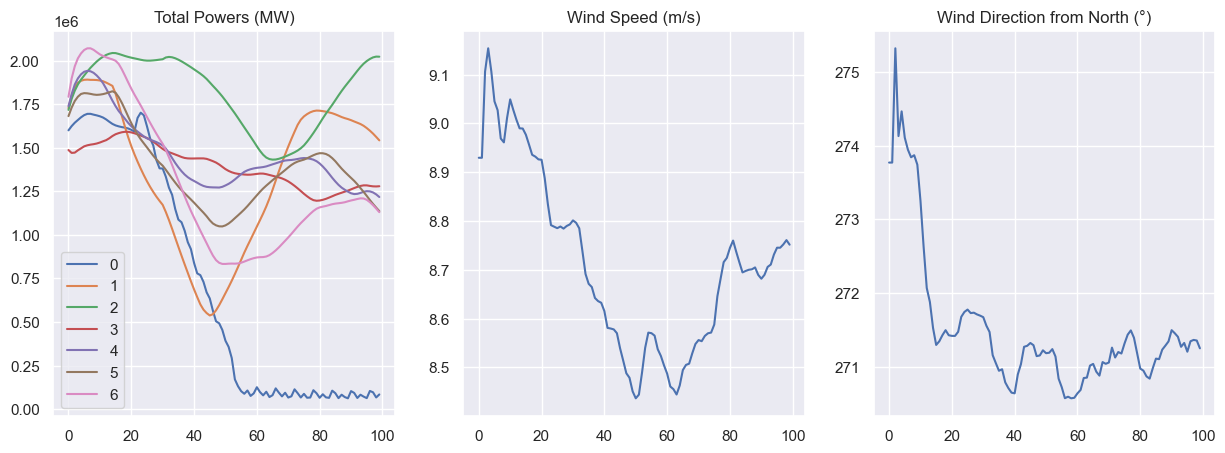

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
pd.DataFrame(avg_powers).plot(ax=ax[0])
wind_array = np.array(avg_wind)
ax[0].set_title("Total Powers (MW)")
sns.lineplot(wind_array[:, 0], ax=ax[1])
ax[1].set_title("Wind Speed (m/s)")
sns.lineplot(wind_array[:, 1]).plot(ax=ax[2])
ax[2].set_title("Wind Direction from North (°)")

In [52]:
pd.DataFrame(avg_powers).iloc[:,0]

0     1.599823e+06
1     1.623793e+06
2     1.643356e+06
3     1.659173e+06
4     1.674574e+06
          ...     
95    6.295468e+04
96    1.041534e+05
97    9.639865e+04
98    6.681975e+04
99    8.401517e+04
Name: 0, Length: 100, dtype: float64

Other raw measurements made during the simulation are however also available:

In [36]:
measures = np.array(raw_measures)
print(measures.shape)

(100, 6, 12)


For 44 iterations, every turbine has returned 12 measures. We can see what they correspond to by looking at the interface's measure map. All the raw angle measurements are in radian.

In [37]:
ff_interface.measure_map

{'wind_speed': 0,
 'power': 1,
 'wind_direction': 2,
 'yaw': 3,
 'pitch': 4,
 'torque': 5,
 'load': [6, 7, 8, 9, 10, 11],
 'wind_measurements': None}

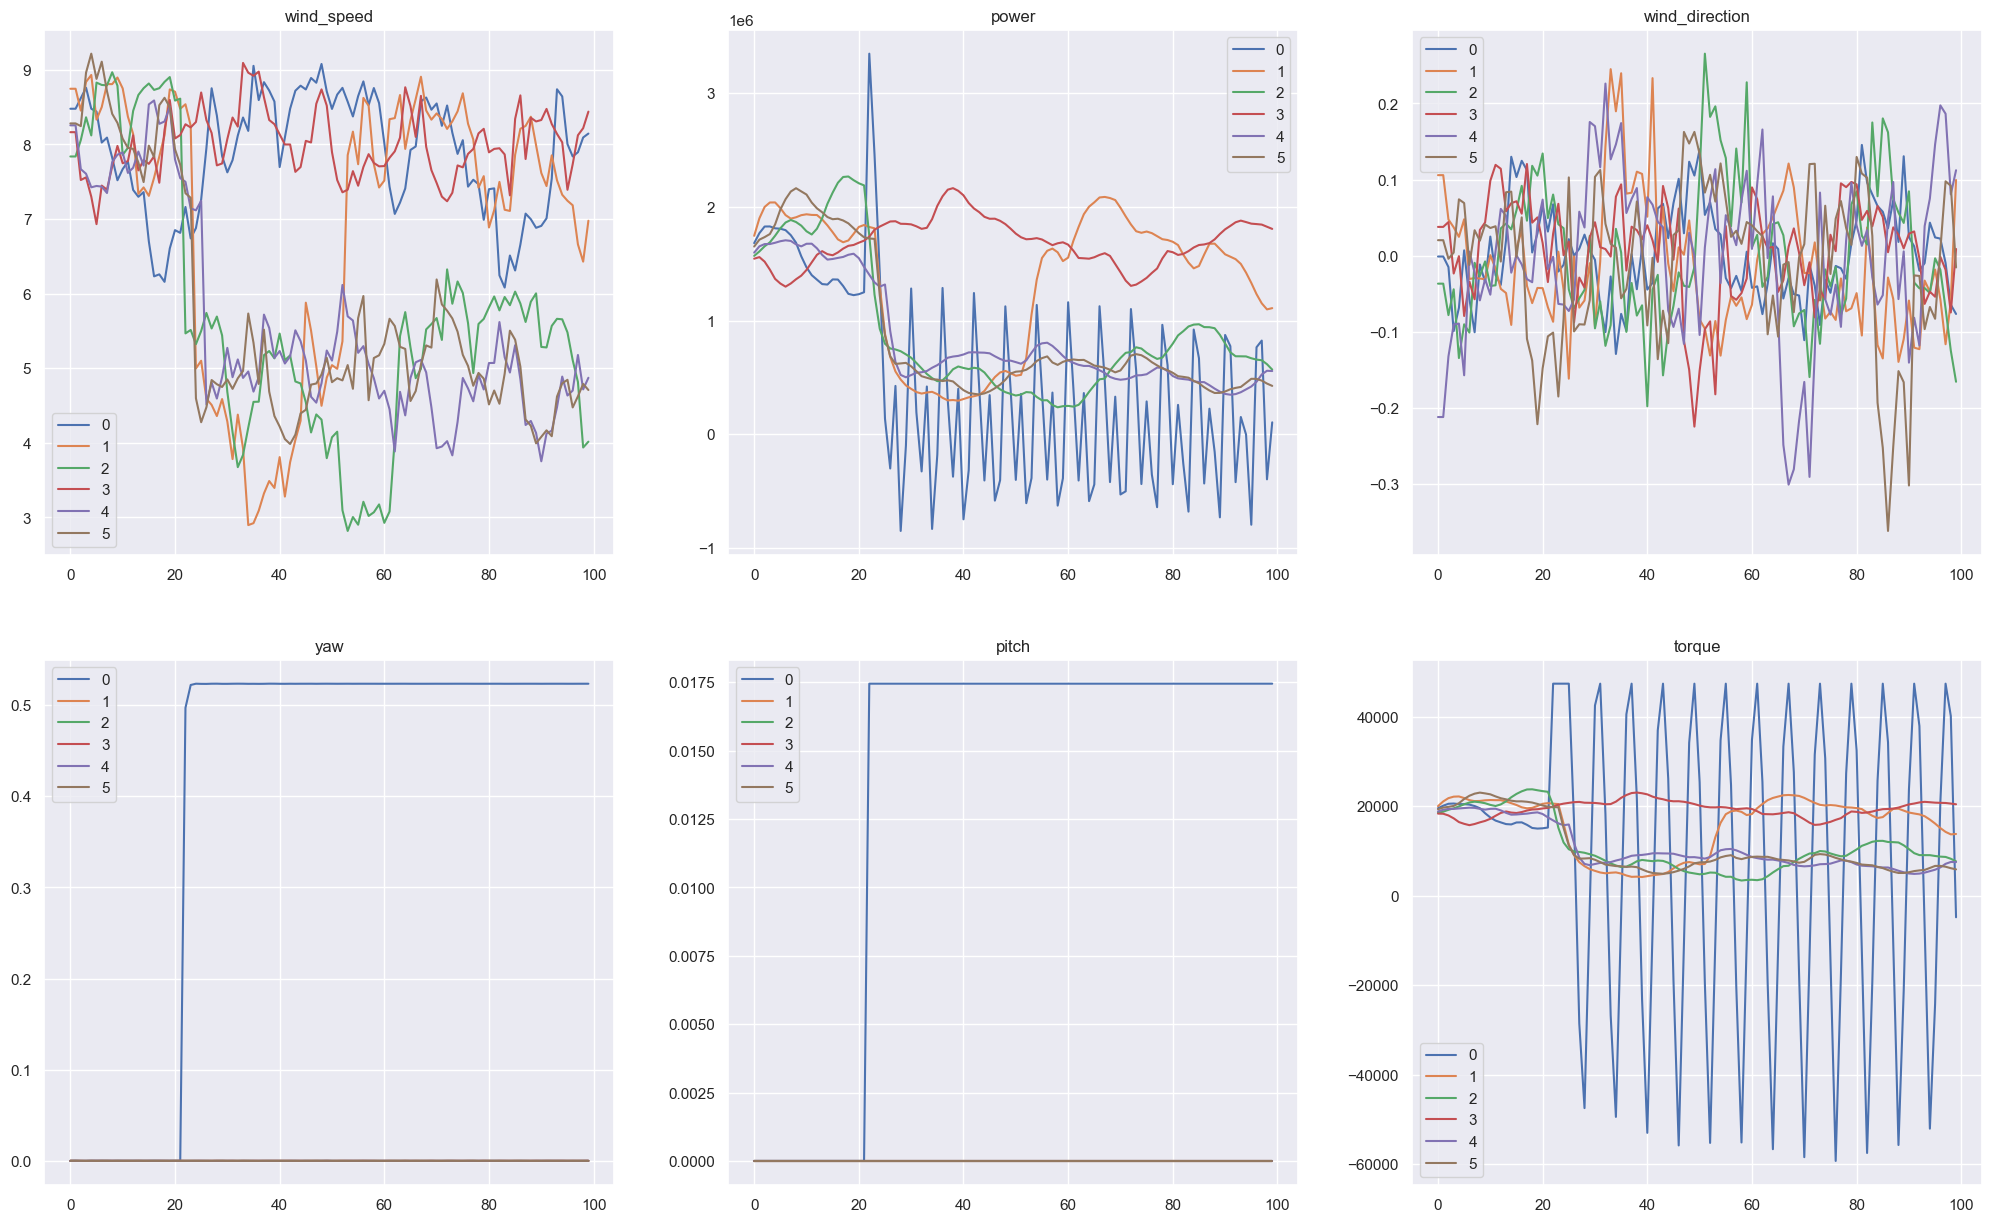

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
for axitem, (item, index) in zip(ax.flatten(), ff_interface.measure_map.items()):
    if not isinstance(index, int):
        continue
    pd.DataFrame(measures[:, :, index]).plot(ax=axitem)
    axitem.set_title(item)

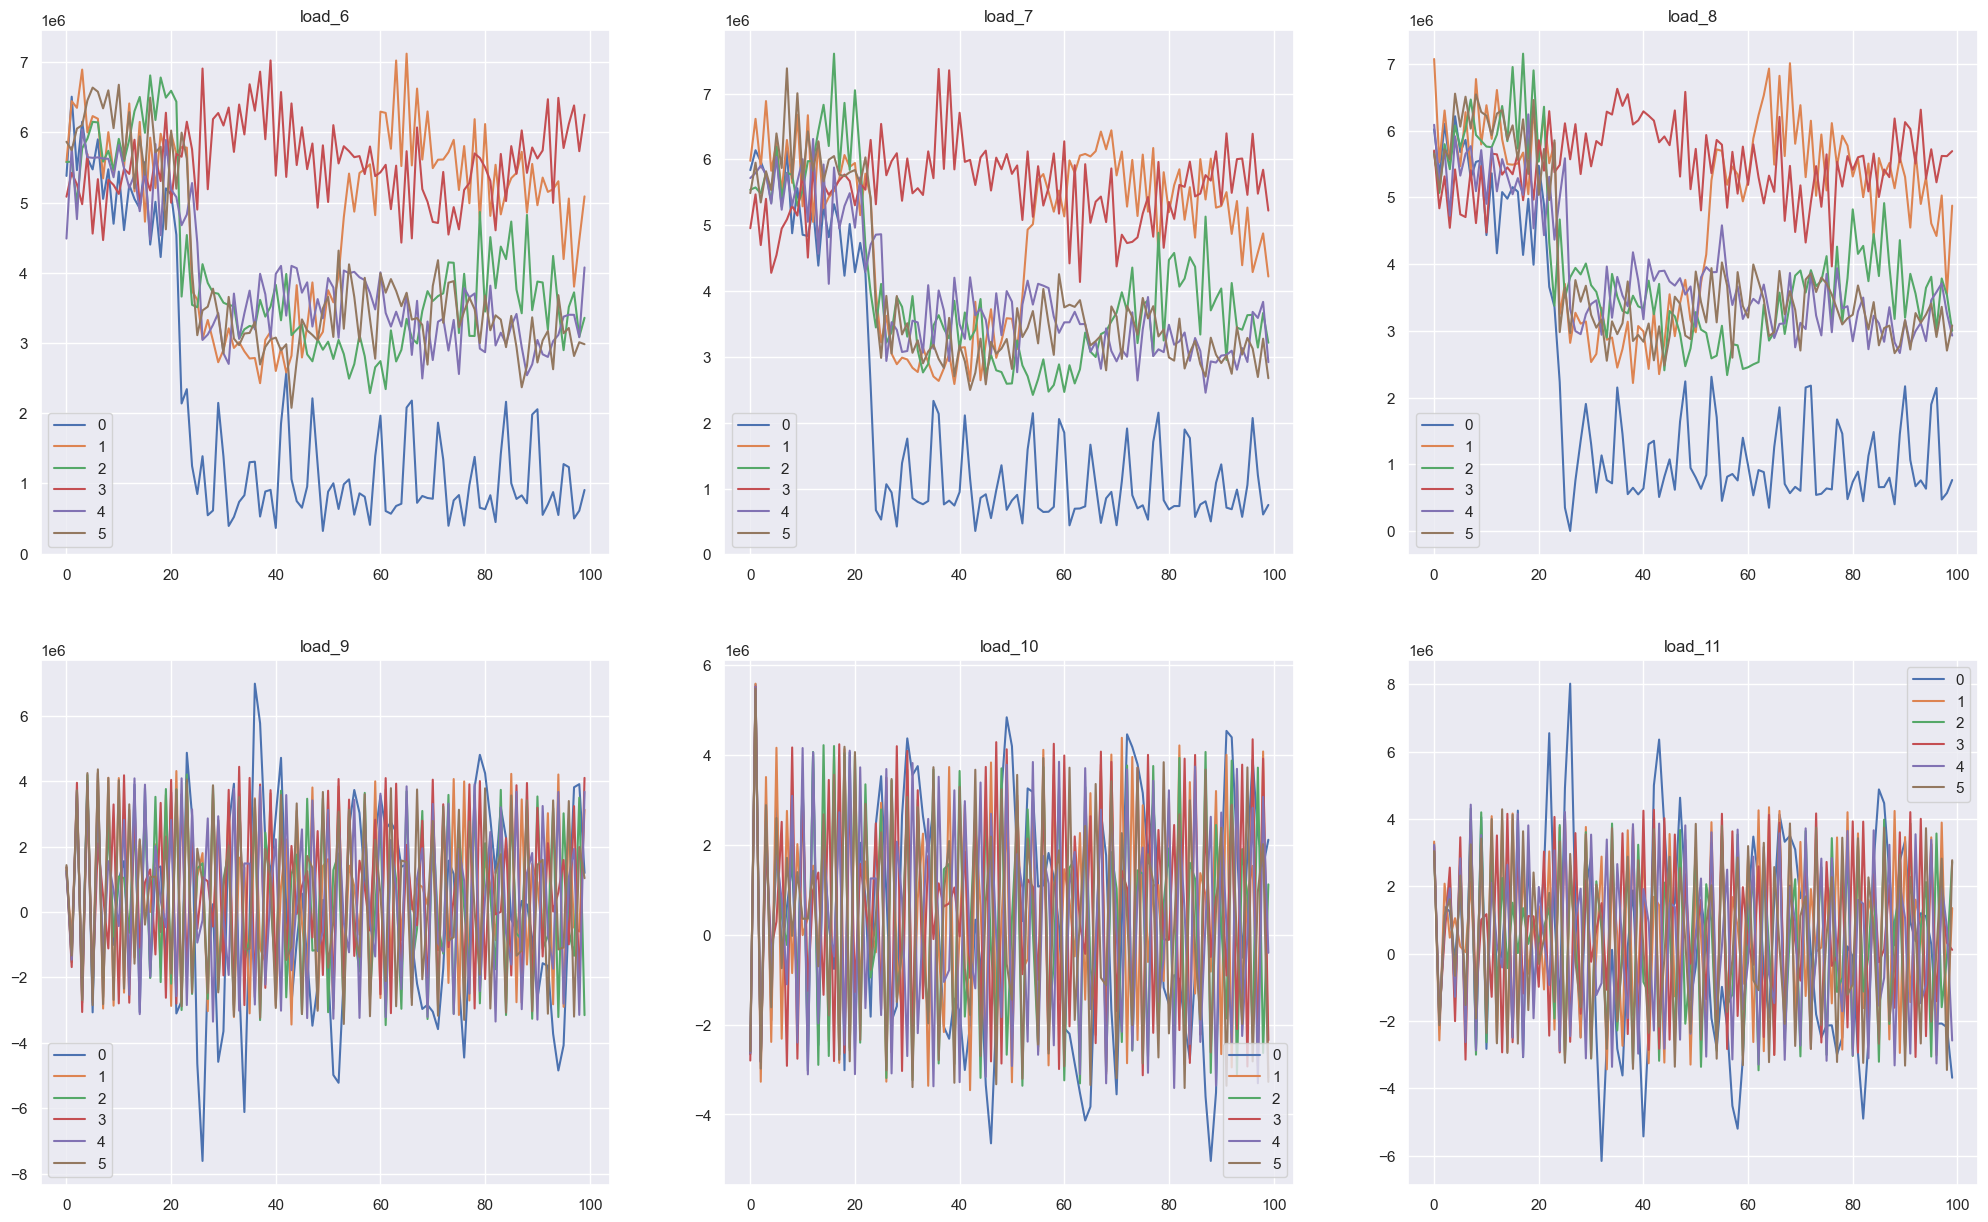

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,15))
for axitem, index in zip(ax.flatten(), ff_interface.measure_map["load"]):
    pd.DataFrame(measures[:, :, index]).plot(ax=axitem)
    axitem.set_title(f"load_{index}")